### Тема: Интервальное оценивание параметров распределения по выборке

**Выполнил**: Лежнин Максим Витальевич (ПМ-31)

**Преподаватель**: Олейник Т.А., кафедра ВМ-1

###### Практическая работа № **5**, вариант № **3**

###### Осенний семестр, 2023 год

###### МИЭТ, Зеленоград

### Библиотеки

In [1]:
import numpy as np
import math
import scipy.stats as sts
import scipy.special as sc
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm
import statsmodels.stats.weightstats
import statsmodels.stats.proportion as smproportion

### Задание 1
Проведите вычислительные эксперименты для иллюстрации понятия доверительного интервала. Сгенерируйте выборку фиксированного объема $n \geq 100$ из генеральной совокупности, имеющей нормальное распределение с конкретными параметрами $m,\, \sigma$ (значение параметров $m,\, \sigma$ и объем выборки выберите самостоятельно). По выборке постройте доверительный интервал для математического ожидания при неизвестной дисперсии (доверительную вероятность примите равной 0.95). Повторите расчеты еще для 49 выборок.
- Какая часть из полученных интервалов накроет параметр $m$? Сопоставьте результаты с доверительной вероятностью и прокомментируйте.
- Визуализируйте результаты, представив найденные доверительные интервалы параллельными вертикальными отрезками (интервалы занумеруйте номера отложите по оси абсцисс).
Повторите эксперимент, увеличив число выборок. Как согласуются полученные результаты с понятием доверительного интревала?

In [2]:
# функция для первого задания, которая генерирует n выборок и
# находит доверительные интервалы для матемтаического ожидания
def get_intervals(m, sig, sample_size, confidence, number_of_intervals):
    # лист интервалов
    intervals = []

    # цикл, где генерируется выборки и интервалы для них
    for i in range(number_of_intervals):
        sample = np.random.normal(m, sig, sample_size)
        confidence_interval = sm.stats.zconfint(sample, alpha=(1 - confidence))
        intervals.append(confidence_interval)

    return intervals

# функция для проверки, находится ли параметр в интервале
def in_interval(parametr, interval):
    if interval[0] < parametr < interval[1]:
        return True
    return False

In [3]:
# размер выборки
sample_size = 1000

# параметры нормального распределения
m = 10
sig = 5

# доверительная вероятность
confidence = 0.95

# количества выборок
numbers_of_samples = [5, 10, 25, 50, 100, 1000, 5000]

# цикл, где для каждого количества выборок строятся доверительные интервалы и 
# высчитываются вероятности того, что оцениваемая величина попала в интервалы
for number_of_samples in numbers_of_samples:
    # получаем интервалы
    intervals = get_intervals(m, sig, sample_size, confidence, number_of_samples)

    # получаем вероятность того, что матожидание попало в интервал
    m_in_interval = 0
    for i in range(number_of_samples):
        m_in_interval += int(in_interval(m, intervals[i]))
    m_in_interval /= number_of_samples

    # вывод результатов на экран
    print(f"С вероятностью: {m_in_interval} m входит в",
    f" интервал (кол-во выборок: {number_of_samples})", sep="")

С вероятностью: 1.0 m входит в интервал (кол-во выборок: 5)
С вероятностью: 1.0 m входит в интервал (кол-во выборок: 10)
С вероятностью: 0.84 m входит в интервал (кол-во выборок: 25)
С вероятностью: 0.9 m входит в интервал (кол-во выборок: 50)
С вероятностью: 0.97 m входит в интервал (кол-во выборок: 100)
С вероятностью: 0.941 m входит в интервал (кол-во выборок: 1000)
С вероятностью: 0.9506 m входит в интервал (кол-во выборок: 5000)


С увеличением числа выборок вероятность попадания m в интервал стремится к доверительной вероятности.

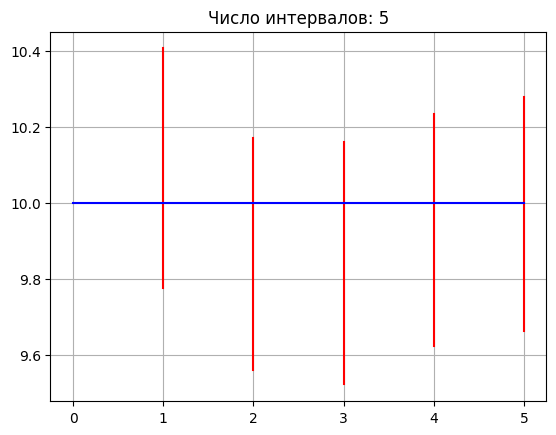

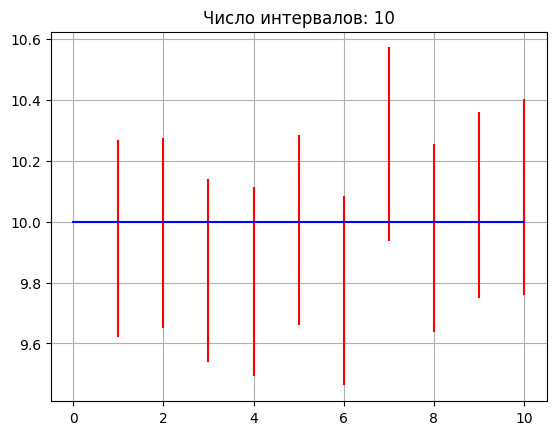

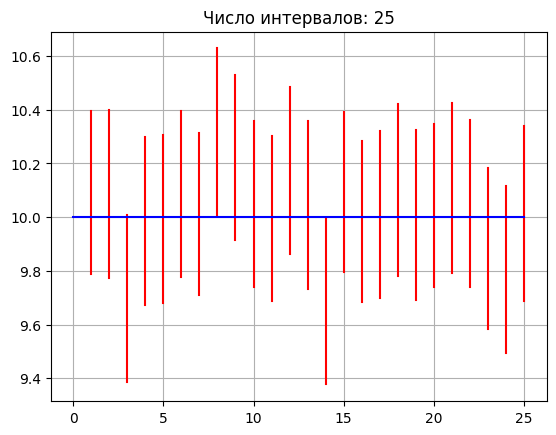

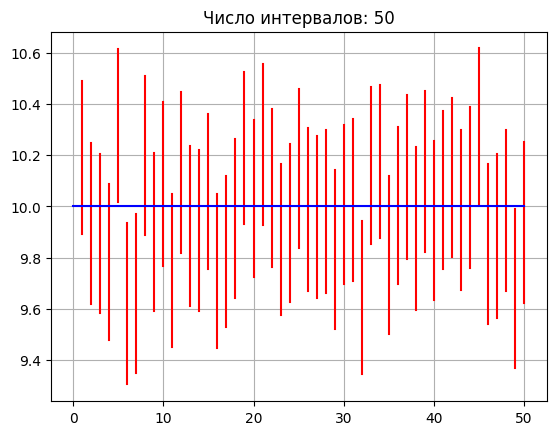

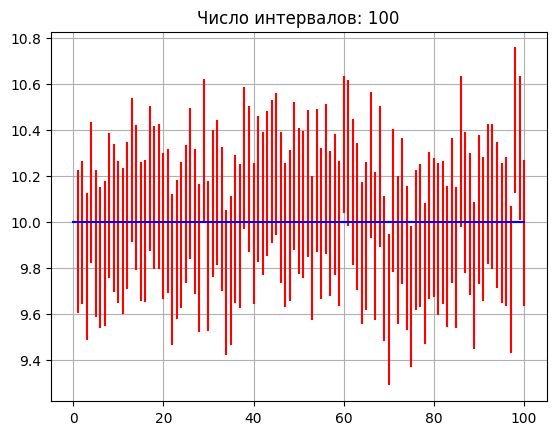

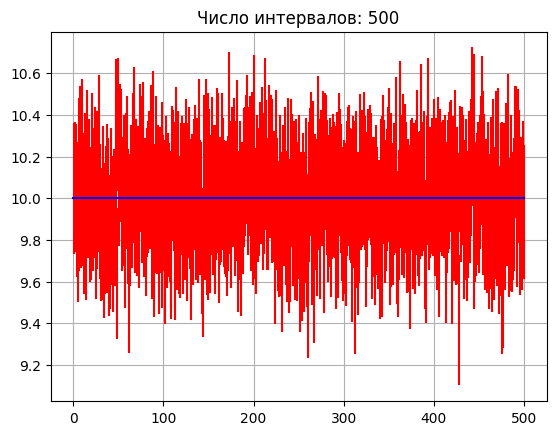

In [4]:
# количества интервалов
numbers_of_samples = [5, 10, 25, 50, 100, 500]

# цикл для визуализации разного количества интервалов
for number_of_samples in numbers_of_samples:
    plt.figure()
    plt.grid(True)
    plt.title(f"Число интервалов: {number_of_samples}")
    intervals = get_intervals(m, sig, sample_size, confidence, number_of_samples)
    for i in range(1, number_of_samples + 1):
        plt.plot([i, i], [intervals[i - 1][0], intervals[i - 1][1]], color='r')
    plt.plot([0, number_of_samples], [m, m], color='b')

При небольшом количестве интервалов ($\leq 100$) проще проследить за попаданием величины в доверительный интервал. При $50-100$ легко заметить, что вероятность попадания величины в ее доверительный интервал близка к доверительной вероятности.

### Задание 2
Исследуйте экспериментально зависимость длины доверительного интервала от доверительной вероятности. Сгенерируйте выборку объема $n$ из генеральной совокупности, имеющей нормальное распределение с конкретными параметрами $m,\, \sigma$ (значение параметров $n,\, m,\, \sigma$ выберите самостоятельно).
- Постройте в одной системе координат графики зависимости левой и правой границ доверительных интервалов для математического ожидания от значения доверительной вероятности $\beta$. Определите диапазон значений $\beta$, при которых доверительный интервал, построенный по сгенерированной выборке, не накрывает истинное значение математического ожидания.
- Выполните п.1 для дисперсии.
Прокомментируйте полученные результаты.

In [3]:
# доверительный интервал для дисперсии (при неизвестном мат ожидании)
def confidence_interval_for_var(sample, alpha):
    confidence = 1 - alpha
    n = len(sample)
    S_sq = n / (n - 1) * np.var(sample)
    left_border = (n - 1) * S_sq / (sts.chi2.ppf((1 + confidence) / 2, n-1))
    right_border = (n - 1) * S_sq / (sts.chi2.ppf((1 - confidence) / 2, n-1))
    return (left_border, right_border)

При 0 <= β < 0.9460000000000001 интервал не накрывает мат ожидание
При 0 <= β < 0.657 интервал не накрывает дисперсию


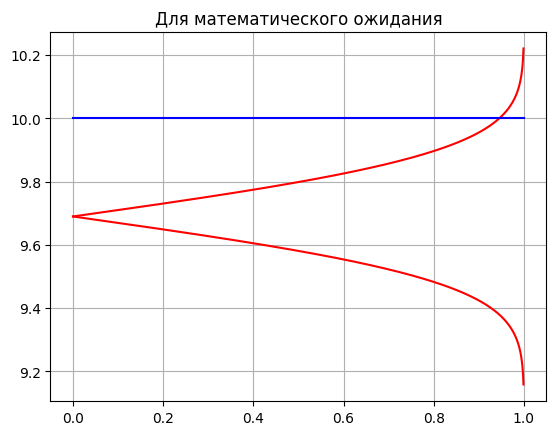

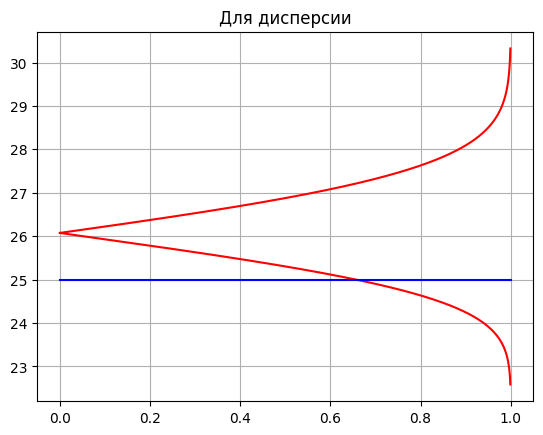

In [6]:
# размер выборки
sample_size = 1000

# параметры нормального распределения
m = 10
sig = 5

# нормальная выборка
sample = np.random.normal(m, sig, sample_size)

# лист доверительных вероятностей
beta = [i for i in np.arange(0, 1, 0.001, dtype=float)]

# листы границ интервалов для мат ожидания
left_border_mean = []
right_border_mean = []

# листы границ интервалов для дисперсии
left_border_var = []
right_border_var = []

# цикл для получения границ интервалов для каждой доверительной вероятности
for confidence in beta:
    # получаем интервал для мат ожидания и записываем границы
    confidence_interval_mean = sm.stats.zconfint(sample, alpha=(1 - confidence))
    left_border_mean.append(confidence_interval_mean[0])
    right_border_mean.append(confidence_interval_mean[1])

    # получаем интервал для дисперсиии записываем границы
    confidence_interval_var = confidence_interval_for_var(sample, 1 - confidence)
    left_border_var.append(confidence_interval_var[0])
    right_border_var.append(confidence_interval_var[1])

# доверительная вероятность, ниже которой оцениваемая величина не попадает в интервал
max_beta_for_mean = 0
max_beta_for_var = 0

# цикл для получения этих доверительных вероятностей
for i in range(len(beta)):
    # для мат ожидания
    if max_beta_for_mean == 0 and left_border_mean[i] < m < right_border_mean[i]:
        max_beta_for_mean = beta[i]

    # для дисперсии
    if max_beta_for_var == 0 and left_border_var[i] < sig**2 < right_border_var[i]:
        max_beta_for_var = beta[i]

    # небольшая оптимизация
    if max_beta_for_mean != 0 and max_beta_for_var != 0:
        break

# вывод результатов на экран
print(f"""При 0 <= β < {max_beta_for_mean} интервал не накрывает мат ожидание
При 0 <= β < {max_beta_for_var} интервал не накрывает дисперсию""")

# визуализируем границы интервала для мат ожидания от доверительной вероятности
plt.figure()
plt.plot(beta, left_border_mean, color='r')
plt.plot(beta, right_border_mean, color='r')
plt.plot([0, 1], [m, m], color='b')
plt.title("Для математического ожидания")
plt.grid(True)

# визуализируем границы интервала для дисперсии от доверительной вероятности
plt.figure()
plt.plot(beta, left_border_var, color='r')
plt.plot(beta, right_border_var, color='r')
plt.plot([0, 1], [sig**2, sig**2], color='b')
plt.title("Для дисперсии")
plt.grid(True)

Интервал $\beta$, в котором доверительный интервал не будет накрывать оцениваемый параметр, всегда будет иметь вид $[0,\, k)$, где $k \in (0,\, 1]$.

### Задание 3
Исследуйте вопрос о минимальном объеме выборки, необходимом для достижения заданной точности оценки при проведении экспериментов по схеме Бернулли. При выполнении задания исходите из предположения $X \sim B(n,\, p),\ \sqrt{npq} \gg 1$ и используйте приближенный доверительный интервал:
$$P^* - u_{\frac{1 + \beta}{2}} \cdot \sqrt{\frac{P^*(1 - P^*)}{n}} < p < P^* + u_{\frac{1 + \beta}{2}} \cdot \sqrt{\frac{P^*(1 - P^*)}{n}}$$

- Сгенерируйте выборки различных объемов $n$ из генеральной совокупности, имеющей индикаторное распределение с параметром $p$ (значение параметра $p$ выберите самостоятельно). Для каждой выборки найдите доверительный интервал для вероятности события $p$ (доверительную вероятность принять равной 0.95). Результаты визуализируйте, построив график экспериментальной зависимости верхней и нижней границ доверительных интервалов от объема выборки. Экспериментально оцените минимальный объем выборки, позволяющий при заданной доверительной вероятности утверждать, что доля "успехов" в выборке отличается от значения $p$ не более, чем на 2%.
- Теоретически оцените минимальный объем выборки, позволяющий при заданной доверительной вероятности утверждать, что доля "успехов" в выборке отличается от значения параметра $p$ не более, чем на 2%. Сравните теоретические и экспериментально полученные результаты.
- Используя функцию samplesize_confint_proportion, оцените минимальный объем выборки, позволяющий при заданной доверительной вероятности утверждать, что доля "успехов" в выборке отличается от значения параметра $p$ не более, чем на 2%. Сравните результаты с результатами п.1 и п.2.

То есть мы хотим получить минимальный объем выборки, для которого выполняется:
$$|P^* - p| < 0.02p$$

То есть:
$$P^* - 0.02p < p < P^* + 0.02p$$

Из данного доверительного интервала и полученного выражения можем заключить, что:
$$u_{\frac{1 + \beta}{2}} \cdot \sqrt{\frac{P^*(1 - P^*)}{n}} \leq 0.02p$$
$$u_{\frac{1 + \beta}{2}}^2 \cdot \frac{P^*(1 - P^*)}{n} \leq 0.0004p^2$$
$$u_{\frac{1 + \beta}{2}}^2 \cdot \frac{P^*(1 - P^*)}{0.0004p^2} \leq n$$

Так как $P^*$ - несмещенная и состоятельная оценка, то можно воспользоваться $P^* \approx p$ и тогда:
$$u_{\frac{1 + \beta}{2}}^2 \cdot \frac{p(1 - p)}{0.0004p^2} \leq n$$

Пусть $p = 0.8$. Получим минимальный объем выборки:
$$n \geq u_{\frac{1 + \beta}{2}}^2 \cdot \frac{p(1 - p)}{0.0004p^2} = (1.96)^2 \frac{0.8 \cdot 0.2}{0.0004 \cdot (0.8)^2} = 2401$$

In [7]:
# доверительный интервал для p
def confidence_interval_for_p(sample, confidence):
    P_star = sum(sample) / len(sample)
    u = sts.norm.ppf((1 + confidence) / 2)
    root = np.sqrt(P_star * (1 - P_star) / len(sample))
    left_border = P_star - u * root
    right_border = P_star + u * root
    return (left_border, right_border)

Минимальный объем выборки (экспериментальный): 2535
Минимальный объем выборки (функция python): 2400.911762933828


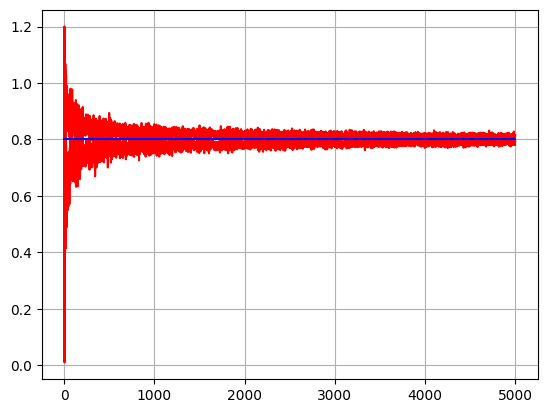

In [8]:
# параметр индикаторного распределения
p = 0.8

# доверительная вероятность
confidence = 0.95

# размеры выборок
sample_sizes = [i for i in range(1, 5001, 1)]

# листы границ интервалов
left_border = []
right_border = []
av_p = []

# минимальный размер выборки, начиная с которого среднее выборочное 
# имеет ошибку не более 2% p
min_sample_size = 0

# цикл для генерации выборок и получения границ интервалов на них
for sample_size in sample_sizes:
    # генерируем выборку
    sample = np.random.binomial(1, p, sample_size)

    # получаем доверительный интервал и записываем его границы
    interval = confidence_interval_for_p(sample, confidence)
    left_border.append(interval[0])
    right_border.append(interval[1])

    # так как интервал симметричен относительно среднего выборочного, топроверяем
    #  длину любой половины интервала, например левой (она должна быть меньше 2% p)
    p_star = sum(sample) / sample_size
    # если длина половины интервала больше 2% p, то 
    # минимальный размер выборки должен быть больше
    if p_star - interval[0] > 0.02 * p:
        min_sample_size = sample_size + 1

# выводим на экран результат
print(f"Минимальный объем выборки (экспериментальный): {min_sample_size}")

# результат специальной функции для расчета размера выборки
min_size = smproportion.samplesize_confint_proportion(p, p * 0.02, 1 - confidence)
print(f"Минимальный объем выборки (функция python): {min_size}")

# визуализируем
plt.figure()
plt.plot(sample_sizes, left_border, color='r')
plt.plot(sample_sizes, right_border, color='r')
plt.plot([min(sample_sizes), max(sample_sizes)], [p, p], color='b')
plt.grid(True)

Если округлить значение функции python, то оно совпадает с теоретическим. Экспериментальное же значение различается немного. По моим наблюдения ошибка находится в 10% от теоретического значения.

### Задание 4
Экспериментально сопоставьте методы получения интервальных оценок: параметрический (традиционный) и бутстреп. Сгенерируйте 20 выборок фиксированного объема $n \geq 100$ из генеральной совокупности, имеющей нормальное распределение с конкретными параметрами $m,\, \sigma$ (значение параметров $m,\, \sigma$ и объем выборки выберите самостоятельно).
- Для каждой выборки получите интервальные оценки методом бутстреп для математического ожидания и дисперсии (доверительную вероятность примите равной 0.95). Сопоставьте результат с соответствующими доверительными интервалами, полученными традиционным путем.
- Визуализируйте результаты, представив парами вертикальных отрезков полученные двумя способами интервальные оценки для математического ожидания. Аналогичное построение выполните для интервальных оценок дисперсии.
Прокомментируйте результаты.

In [8]:
def bootstrap_metod(sample, func, size=10000):
    parametr_sample = []
    for i in range(size):
        new_sample = np.random.choice(sample, size=len(sample))
        parametr_sample.append(func(new_sample))
    return parametr_sample

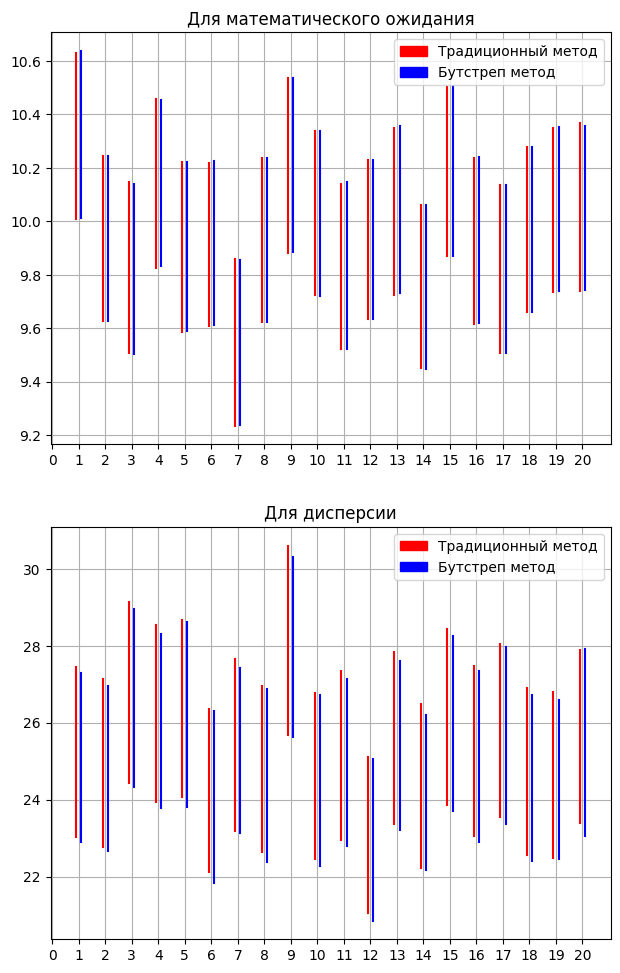

In [9]:
# число выборок
number_of_samples = 20

# размер выборки
sample_size = 1000

# параметры нормального распределения
m = 10
sig = 5

# доверительная вероятность
confidence = 0.95

# настраиваем визуализацию
fig, ax = plt.subplots(2, 1)
plt.subplots_adjust(right=1, top=2)
traditional_legend = mpatches.Patch(color='r', label='Традиционный метод')
bootstrap_legend = mpatches.Patch(color='b', label='Бутстреп метод')

ax[0].set_title("Для математического ожидания")
ax[0].set_xticks([i for i in range(number_of_samples + 1)])
ax[0].legend(handles=[traditional_legend, bootstrap_legend])
ax[0].grid(True)

ax[1].set_title("Для дисперсии")
ax[1].set_xticks([i for i in range(number_of_samples + 1)])
ax[1].legend(handles=[traditional_legend, bootstrap_legend])
ax[1].grid(True)

# каждый интервал имеет свой номер, на котором он строится
# чтобы построить два интервала на одном номере - нужно их построить со смещением
# для традиционного метода: x - step, для бутсреп: x + step
# где x - номер интервала
step = 0.1

# цикл для получения и визуализации интервалов
for i in range(1, number_of_samples + 1):
    # строим выборку
    sample = np.random.normal(m, sig, sample_size)

    # строим бутстреп выборку (для мат ожидания)
    bootstrap_sample = bootstrap_metod(sample, np.mean)

    # получаем бутстреп интервал (для мат ожидания)
    bootstrap_interval_mean = np.percentile(bootstrap_sample, [2.5, 97.5])

    # строим бутстреп выборку (для дисперсии)
    bootstrap_sample = bootstrap_metod(sample, np.var)

    # получаем бутстреп интервал (для дисперсии)
    bootstrap_interval_variance = np.percentile(bootstrap_sample, [2.5, 97.5])

    # получаем традиционный интервал (для мат ожидания)
    traditional_interval_mean = sm.stats.zconfint(sample, alpha=(1 - confidence))

    # получаем традиционный интервал (для дисперсии)
    traditional_interval_variance = confidence_interval_for_var(sample, (1 - confidence))

    # визуализируем результаты
    ax[0].plot([i - step, i - step], list(traditional_interval_mean), color='r')
    ax[0].plot([i + step, i + step], list(bootstrap_interval_mean), color='b')
    ax[1].plot([i - step, i - step], list(traditional_interval_variance), color='r')
    ax[1].plot([i + step, i + step], list(bootstrap_interval_variance), color='b')

Интервалы полученные бутстреп методом очень похожи на интервалы, которые получили с помощью стандартного параметрического метода, и практически повторяют их с небольшими отклонениями. Явным преимуществом бутстреп метода является то, что у него нет привязки к конкретному распределению. Действительно, в вычислениях интервалов мы этим не пользовались, но интервалы получились очень похожими на те, что получили с помощью традиционного метода.